In [317]:
# Modules import
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    plot_confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from numpy.random import RandomState

In [318]:
# Supressão de warnings
import warnings

warnings.filterwarnings("ignore")

In [319]:
# Aumenta o número de linhas para visualização
pd.set_option('display.max_rows', 200)

In [320]:
RANDOM_NUM = 42
np.random.seed(42)
RANDOM_STATE = RandomState(42)

In [321]:
df = pd.read_csv("weight_lifting.csv", header=1)
df.to_csv(r'outputs/original_database.csv', quoting=csv.QUOTE_NONNUMERIC)
df.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1322489729,34670,28/11/2011 14:15,no,1,3.70,41.6,-82.8,3,...,-0.05,-0.37,-0.43,-170,155,184,-1160,1400,-876,E
1,eurico,1322489729,62641,28/11/2011 14:15,no,1,3.66,42.8,-82.5,2,...,-0.06,-0.37,-0.59,-178,164,182,-1150,1410,-871,E
2,eurico,1322489729,70653,28/11/2011 14:15,no,1,3.58,43.7,-82.3,1,...,-0.05,-0.27,-0.72,-182,172,185,-1130,1400,-863,E
3,eurico,1322489729,82654,28/11/2011 14:15,no,1,3.56,44.4,-82.1,1,...,0.02,-0.24,-0.79,-185,182,188,-1120,1400,-855,E
4,eurico,1322489729,90637,28/11/2011 14:15,no,1,3.57,45.1,-81.9,1,...,0.08,-0.27,-0.82,-188,195,188,-1100,1400,-843,E


In [322]:
def print_unique(df):
    for col in df.columns[:-1]:
        print(col, df[col].unique())

In [323]:
print_unique(df)

user_name ['eurico' 'jeremy' 'adelmo' 'carlitos' 'pedro']
raw_timestamp_part_1 [1322489729 1322489730 1322673166 1322832938 1322832939 1322832940
 1322832941 1322832942 1322832943 1322832945 1323084231 1323084232
 1323084233 1323084234 1323084235 1323084236 1323084237 1323084238
 1323084326 1323084327 1323084328 1323084330 1323084331 1323084332
 1323084333 1323084334 1323084335 1323084336 1323084337 1323084338
 1323084340 1323084341 1323084342 1323084343 1323084345 1323084346
 1323084347 1323084348 1323084351 1323084352 1323084353 1323084354
 1323084355 1323084356 1323094969 1323094970 1323094971 1323094972
 1323094973 1323094974 1323094975 1323094976 1323094977 1323094979
 1323094980 1323094981 1323094982 1323094983 1323094985 1323094986
 1323094987 1323094988 1323094990 1323094992 1323094993 1323094995
 1323094996 1323094997 1323094998 1323094999 1323095001 1323095002
 1323095003 1323095004 1323095005 1323095006 1323095007 1323095009
 1323095010 1323095011 1323095012 1323095013 13230

 21.77042 16.61666]
var_pitch_forearm [          nan 1.1193666e+02 5.8052200e+00 4.4200000e-03 0.0000000e+00
 5.5900000e-03 1.0160000e-02 6.1100000e-03 1.6660000e-02 1.1130000e-02
 1.0200000e-02 3.7100000e-03 5.2314670e+01 9.9560280e+01 5.0323990e+01
 6.5964100e+01 7.3807920e+01 3.2667000e-01 2.3958097e+02 1.4052000e+00
 2.7020360e+02 3.9988886e+02 2.1615377e+02 2.2882668e+02 3.2671233e+02
 1.6892462e+02 1.0421957e+02 1.2955954e+02 6.7787150e+01 2.2962118e+02
 3.8540300e+01 2.7889675e+02 6.9750210e+01 2.8787235e+02 8.0631360e+01
 9.9744600e+00 6.4295350e+01 2.9412100e+00 1.9277000e-01 5.0050000e-02
 7.5537000e-01 1.8918300e+00 4.6106500e+00 4.4758000e-01 3.5810000e-02
 1.3110300e+00 1.1054000e-01 1.9167896e+02 5.5300669e+02 2.9746678e+02
 5.0291366e+02 7.1445270e+02 1.6034147e+02 1.7747307e+02 5.8230039e+02
 3.2105186e+02 4.0163859e+02 3.9177279e+02 5.9344400e+01 5.2313050e+01
 1.9386796e+02 5.6230950e+01 1.5067634e+02 9.5427480e+01 7.1845000e-01
 3.6040942e+02 3.5064373e+02 5.6145535e

### Limpeza mínima da base de dados

In [324]:
df.drop(columns=["user_name", "cvtd_timestamp",], inplace=True)
df.dtypes

raw_timestamp_part_1          int64
raw_timestamp_part_2          int64
new_window                   object
num_window                    int64
roll_belt                   float64
pitch_belt                  float64
yaw_belt                    float64
total_accel_belt              int64
kurtosis_roll_belt          float64
kurtosis_picth_belt          object
kurtosis_yaw_belt            object
skewness_roll_belt          float64
skewness_roll_belt.1         object
skewness_yaw_belt            object
max_roll_belt               float64
max_picth_belt              float64
max_yaw_belt                float64
min_roll_belt               float64
min_pitch_belt              float64
min_yaw_belt                float64
amplitude_roll_belt         float64
amplitude_pitch_belt        float64
amplitude_yaw_belt          float64
var_total_accel_belt        float64
avg_roll_belt               float64
stddev_roll_belt            float64
var_roll_belt               float64
avg_pitch_belt              

In [325]:
# Convertendo coluna "new_window" para booleano
df['new_window'] = np.where(
    df['new_window'].str.lower() == 'yes', 1, 0)
df['new_window'] = df['new_window'].astype(int)

In [326]:
for col in df.columns[:-1]:
    # Corrigindo campos com "#DIV/0!"
    if df[col].dtype == object:
        df[col] = df[col].str.replace("#DIV/0!", "0")
        df[col] = df[col].astype(float)

    # Corrigindo valores N/A com a média ou "0"
    if df[col].dtype in (int, float):
        df[col] = df[col].replace(np.nan, df[col].mean())
    else:
        df[col] = df[col].replace(np.nan, "0")

In [327]:
print_unique(df)

raw_timestamp_part_1 [1322489729 1322489730 1322673166 1322832938 1322832939 1322832940
 1322832941 1322832942 1322832943 1322832945 1323084231 1323084232
 1323084233 1323084234 1323084235 1323084236 1323084237 1323084238
 1323084326 1323084327 1323084328 1323084330 1323084331 1323084332
 1323084333 1323084334 1323084335 1323084336 1323084337 1323084338
 1323084340 1323084341 1323084342 1323084343 1323084345 1323084346
 1323084347 1323084348 1323084351 1323084352 1323084353 1323084354
 1323084355 1323084356 1323094969 1323094970 1323094971 1323094972
 1323094973 1323094974 1323094975 1323094976 1323094977 1323094979
 1323094980 1323094981 1323094982 1323094983 1323094985 1323094986
 1323094987 1323094988 1323094990 1323094992 1323094993 1323094995
 1323094996 1323094997 1323094998 1323094999 1323095001 1323095002
 1323095003 1323095004 1323095005 1323095006 1323095007 1323095009
 1323095010 1323095011 1323095012 1323095013 1323095015 1323095016
 1323095017 1323095018 1323095019 1323095

 1.84216500e+01 8.04062100e+01 1.95626246e+04]
avg_pitch_forearm [ 1.75011282e+01  1.17157400e+01 -1.77682900e+01 -4.04250000e+00
  0.00000000e+00 -6.39000000e+01 -6.38938800e+01 -6.37941200e+01
 -6.37521700e+01 -6.33312500e+01 -6.35339600e+01 -6.36708300e+01
 -6.34972200e+01  4.49820500e+01  4.16150000e+01  4.75414600e+01
  4.47909100e+01  4.90000000e+01  5.91000000e+01  1.79985700e+01
  9.48313000e+00  2.62455800e+01  2.09496700e+01  2.29410400e+01
  2.71856000e+01  2.60764600e+01  2.41574500e+01  3.25255800e+01
  2.78078400e+01  3.34627900e+01  2.89255000e+01  3.84658500e+01
  1.09585100e+01  3.45659100e+01  1.98984000e+01  3.89000000e+01
  9.60600000e+00  2.83081600e+01  4.11222200e+01 -1.01095000e+00
 -5.90220000e-01 -1.29180000e+00 -1.25000000e-03  1.53890000e-01
  4.07000000e+00  3.10971000e+00  4.59800000e+00  4.44316000e+00
  6.81681800e+01  2.96740000e+01  5.30963000e+01  5.51459500e+01
  2.89873500e+01  2.22734000e+01  5.65225000e+01  4.37327300e+01
  4.73477300e+01  4.09557

In [328]:
df.to_csv(r'outputs/cleaned_database.csv', quoting=csv.QUOTE_NONNUMERIC)

### Divisão entre base de treino e teste

In [329]:
# Datasets
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,)

### Descobrir os melhores parâmetros para os classificadores

In [330]:
models_base = [
    {
        "name": "LR",
        "classifier": LogisticRegression(),
        "parameters": [
            {
                "penalty": ["l2"],
                "solver": ["newton-cg", "sag", "lbfgs", "liblinear"],
                "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                "fit_intercept": [True, False],
                "multi_class": ["auto", "ovr"],
            },
            {
                "penalty": ["elasticnet"],
                "solver": ["saga"],
                "C": [0.001],
                "fit_intercept": [True, False],
                "multi_class": ["auto", "ovr", "multinomial"],
                "l1_ratio": [0, 0.5, 1],
            },
        ],
    },
    {
        "name": "SVM",
        "classifier": SVC(),
        "parameters": [
            {
                "C": [0.1, 0.5, 1, 10, 100, 500, 1000],
                "gamma": ["scale"],
                "kernel": ["poly"],
                "probability": [True],
            },
            {
                "C": [0.1, 0.5, 1, 10, 100, 500, 1000],
                "gamma": [0.1, 0.001, 0.0001, 0.00001],
                "kernel": ["rbf"],
                "probability": [True],
            },
        ],
    },
    {
        "name": "MPL",
        "classifier": MLPClassifier(),
        "parameters": [
            {
                "solver": ["lbfgs", "sgd", "adam"],
                "alpha": [1e-4, 1e-5],
                "hidden_layer_sizes": [(5, 2), (100,)],
            }
        ],
    },
]


In [331]:
# Treinar e predizer com GridSearchCV
models_base_predict = []
for mb in models_base:
    model = GridSearchCV(mb["classifier"], mb["parameters"], n_jobs=-1, verbose=1)
    model = model.fit(X_train, np.ravel(y_train, order="C"))
    predict = model.predict(X_test)

    best_parameters = model.best_params_
    result = {
        "name": mb["name"],
        "best_score": model.best_score_,
        "best_parameters": best_parameters,
        "predict": predict,
        "model": model,
    }
    pprint(result)
    models_base_predict.append(result)


Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:  4.8min finished


{'best_parameters': {'C': 0.1,
                     'fit_intercept': True,
                     'multi_class': 'ovr',
                     'penalty': 'l2',
                     'solver': 'newton-cg'},
 'best_score': 0.9794564704073452,
 'model': GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'fit_intercept': [True, False],
                          'multi_class': ['auto', 'ovr'], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'sag', 'lbfgs', 'liblinear']},
                         {'C': [0.001], 'fit_intercept': [True, False],
                          'l1_ratio': [0, 0.5, 1],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             verbose=1),
 'name': 'LR',
 'predict': array(['E', 'E', 'A', ..., 'A', 'E', 'E'], dtype=object)}
Fitting 5 folds for each of 35 c

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  7.5min finished


{'best_parameters': {'C': 10,
                     'gamma': 1e-05,
                     'kernel': 'rbf',
                     'probability': True},
 'best_score': 0.6573984382722151,
 'model': GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.5, 1, 10, 100, 500, 1000],
                          'gamma': ['scale'], 'kernel': ['poly'],
                          'probability': [True]},
                         {'C': [0.1, 0.5, 1, 10, 100, 500, 1000],
                          'gamma': [0.1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf'], 'probability': [True]}],
             verbose=1),
 'name': 'SVM',
 'predict': array(['E', 'E', 'A', ..., 'A', 'E', 'E'], dtype=object)}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    7.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.6s finished


{'best_parameters': {'alpha': 0.0001,
                     'hidden_layer_sizes': (5, 2),
                     'solver': 'sgd'},
 'best_score': 0.34459929930919353,
 'model': GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 1e-05],
                          'hidden_layer_sizes': [(5, 2), (100,)],
                          'solver': ['lbfgs', 'sgd', 'adam']}],
             verbose=1),
 'name': 'MPL',
 'predict': array(['A', 'A', 'A', ..., 'A', 'A', 'A'], dtype='<U1')}


### Treinar e predizer com os parâmetros ajustados

In [332]:
models_base = [
    ('LR', LogisticRegression(**{'C': 0.1,
                     'fit_intercept': True,
                     'multi_class': 'ovr',
                     'penalty': 'l2',
                     'solver': 'newton-cg'})),
    ('SVM', SVC(**{'C': 10,
                     'gamma': 1e-05,
                     'kernel': 'rbf',
                     'probability': True})),
    ('MPL', MLPClassifier(**{'alpha': 0.0001,
                     'hidden_layer_sizes': (5, 2),
                     'solver': 'sgd'}))
]
models_base_predict = []
for result in models_base:
    name, model = result
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    models_base_predict.append({
        "name": name,
        "model": model,
        "predict": predict
    })

### Avaliar predições

In [333]:

def plot_results():
    for result in models_base_predict:
        print(f"Model: {result['name']}")
        print(f"Accuracy: {round(accuracy_score(y_test, result['predict']), 4)}")
        print(f"F1: {round(f1_score(y_test, result['predict'], average='macro'), 4)}")
        print(f"Precision: {round(precision_score(y_test, result['predict'], average='macro'), 4)}")
        print(f"Recall: {round(recall_score(y_test, result['predict'], average='macro'), 4)}")
        print()
        print(confusion_matrix(y_test, result["predict"]))
        print()
        print(classification_report(y_test, result["predict"]))
        print()
        plot_confusion_matrix(model, X_test, y_test)
        plt.show()
        print("--------------------------------------------")


Model: LR
Accuracy: 0.9821
F1: 0.9673
Precision: 0.9633
Recall: 0.9719

[[322   3   0   0   0]
 [  6 209   3   0   0]
 [  0   1  25   0   0]
 [  0   0   0  62   3]
 [  0   0   0   2 370]]

              precision    recall  f1-score   support

           A       0.98      0.99      0.99       325
           B       0.98      0.96      0.97       218
           C       0.89      0.96      0.93        26
           D       0.97      0.95      0.96        65
           E       0.99      0.99      0.99       372

    accuracy                           0.98      1006
   macro avg       0.96      0.97      0.97      1006
weighted avg       0.98      0.98      0.98      1006




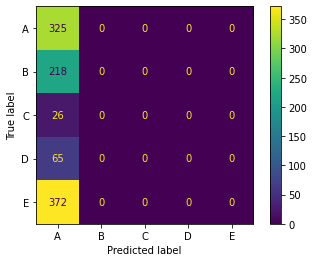

--------------------------------------------
Model: SVM
Accuracy: 0.6988
F1: 0.621
Precision: 0.855
Recall: 0.558

[[204  10   1   0 110]
 [ 14  98   0   0 106]
 [  0   1  11   0  14]
 [  0   0   0  19  46]
 [  0   0   0   1 371]]

              precision    recall  f1-score   support

           A       0.94      0.63      0.75       325
           B       0.90      0.45      0.60       218
           C       0.92      0.42      0.58        26
           D       0.95      0.29      0.45        65
           E       0.57      1.00      0.73       372

    accuracy                           0.70      1006
   macro avg       0.85      0.56      0.62      1006
weighted avg       0.79      0.70      0.69      1006




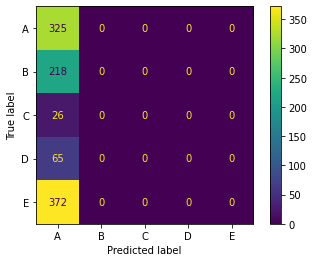

--------------------------------------------
Model: MPL
Accuracy: 0.3231
F1: 0.0977
Precision: 0.0646
Recall: 0.2

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score   support

           A       0.32      1.00      0.49       325
           B       0.00      0.00      0.00       218
           C       0.00      0.00      0.00        26
           D       0.00      0.00      0.00        65
           E       0.00      0.00      0.00       372

    accuracy                           0.32      1006
   macro avg       0.06      0.20      0.10      1006
weighted avg       0.10      0.32      0.16      1006




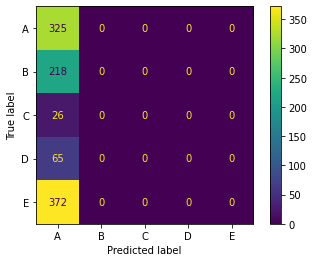

--------------------------------------------


In [334]:
plot_results()